# BASIC LIBRARIES 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# SCIKIT LEARN IMPORT

In [2]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.naive_bayes import GaussianNB, BernoulliNB, CategoricalNB,ComplementNB,MultinomialNB
from sklearn.tree import DecisionTreeClassifier,ExtraTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier,BaggingClassifier,GradientBoostingClassifier,RandomForestClassifier,HistGradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis,QuadraticDiscriminantAnalysis
from sklearn.svm import LinearSVC, SVC
from sklearn.linear_model import RidgeClassifier, LogisticRegression, Perceptron
from sklearn.neighbors import KNeighborsClassifier

# LOAD THE DATASET

In [3]:
df=pd.read_csv('../input/marketing-strategy-personalised-offer/train_data.csv')

# EXPLORATORY ANALYSIS

In [4]:
df.tail()

offer expiration     income_range no_visited_Cold drinks  \
12374          10hours  ₹25000 - ₹37499                  less1   
12375            2days  ₹25000 - ₹37499                    4~8   
12376          10hours  ₹87500 - ₹99999                    4~8   
12377          10hours  ₹12500 - ₹24999                    4~8   
12378            2days  ₹37500 - ₹49999                    1~3   

       travelled_more_than_15mins_for_offer Restaur_spend_less_than20  \
12374                                     1                       gt8   
12375                                     0                     never   
12376                                     1                       gt8   
12377                                     1                     less1   
12378                                     1                     less1   

          Marital Status       restaurant type      age  \
12374  Unmarried partner   Restaurant with pub   50plus   
12375             Single  Take-away restaurant       21   
12376    Married partner           Cold drinks       31   
12377    Married partner     2 star restaurant       26   
12378  Unmarried partner     4 star restaurant  below21   

       Prefer western over chinese  travelled_more_than_25mins_for_offer  ...  \
12374                            0                                     0  ...   
12375                            0                                     0  ...   
12376                            0                                     1  ...   
12377                            0                                     0  ...   
12378                            1                                     0  ...   

       restuarant_opposite_direction_house has Children  \
12374                                    1            1   
12375                                    1            1   
12376                                    1            0   
12377                                    1            0   
12378                                    1            0   

      visit restaurant with rating (avg) temperature  \
12374                                  1          89   
12375                                  2          67   
12376                                  2          89   
12377                                  1          89   
12378                                  0          67   

       Restaur_spend_greater_than20  Travel Time Climate drop location  \
12374                         never           22  Summer    Location B   
12375                         never           18  Summer    Location B   
12376                           gt8           18  Spring    Location B   
12377                         less1            7  Summer    Location C   
12378                         less1            7  Spring    Location A   

       Prefer home food Offer Accepted  
12374                 0            Yes  
12375                 0            Yes  
12376                 1             No  
12377                 0            Yes  
12378                 1            Yes  

[5 rows x 31 columns]

In [5]:
df.describe()

travelled_more_than_15mins_for_offer  Prefer western over chinese  \
count                          12379.000000                 12379.000000   
mean                               0.565393                     0.506665   
std                                0.495725                     0.499976   
min                                0.000000                     0.000000   
25%                                0.000000                     0.000000   
50%                                1.000000                     1.000000   
75%                                1.000000                     1.000000   
max                                1.000000                     1.000000   

       travelled_more_than_25mins_for_offer  \
count                          12379.000000   
mean                               0.119396   
std                                0.324267   
min                                0.000000   
25%                                0.000000   
50%                                0.000000   
75%                                0.000000   
max                                1.000000   

       travelled_more_than_5mins_for_offer  restuarant_same_direction_house  \
count                              12379.0                     12379.000000   
mean                                   1.0                         0.213426   
std                                    0.0                         0.409742   
min                                    1.0                         0.000000   
25%                                    1.0                         0.000000   
50%                                    1.0                         0.000000   
75%                                    1.0                         0.000000   
max                                    1.0                         1.000000   

       Cooks regularly     is foodie  restuarant_opposite_direction_house  \
count     12379.000000  12379.000000                         12379.000000   
mean          0.499556      0.502706                             0.787382   
std           0.500020      0.500013                             0.409176   
min           0.000000      0.000000                             0.000000   
25%           0.000000      0.000000                             1.000000   
50%           0.000000      1.000000                             1.000000   
75%           1.000000      1.000000                             1.000000   
max           1.000000      1.000000                             1.000000   

       has Children  visit restaurant with rating (avg)   temperature  \
count  12379.000000                        12379.000000  12379.000000   
mean       0.415623                            1.987802     71.139187   
std        0.492849                            1.421653     19.215969   
min        0.000000                            0.000000     40.000000   
25%        0.000000                            1.000000     67.000000   
50%        0.000000                            2.000000     67.000000   
75%        1.000000                            3.000000     89.000000   
max        1.000000                            4.000000     89.000000   

        Travel Time  Prefer home food  
count  12379.000000      12379.000000  
mean      13.947896          0.509815  
std        5.395232          0.499924  
min        7.000000          0.000000  
25%       10.000000          0.000000  
50%       14.000000          1.000000  
75%       18.000000          1.000000  
max       22.000000          1.000000

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12379 entries, 0 to 12378
Data columns (total 31 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   offer expiration                      12379 non-null  object
 1   income_range                          12379 non-null  object
 2   no_visited_Cold drinks                12181 non-null  object
 3   travelled_more_than_15mins_for_offer  12379 non-null  int64 
 4   Restaur_spend_less_than20             12258 non-null  object
 5   Marital Status                        12379 non-null  object
 6   restaurant type                       12379 non-null  object
 7   age                                   12379 non-null  object
 8   Prefer western over chinese           12379 non-null  int64 
 9   travelled_more_than_25mins_for_offer  12379 non-null  int64 
 10  travelled_more_than_5mins_for_offer   12379 non-null  int64 
 11  no_visited_bars             

## Looking for missing values

In [7]:
df.isna().sum()

offer expiration                            0
income_range                                0
no_visited_Cold drinks                    198
travelled_more_than_15mins_for_offer        0
Restaur_spend_less_than20                 121
Marital Status                              0
restaurant type                             0
age                                         0
Prefer western over chinese                 0
travelled_more_than_25mins_for_offer        0
travelled_more_than_5mins_for_offer         0
no_visited_bars                            93
gender                                      0
car                                     12268
restuarant_same_direction_house             0
Cooks regularly                             0
Customer type                               0
Qualification                               0
is foodie                                   0
no_Take-aways                             144
Job/Job Industry                            0
restuarant_opposite_direction_hous

## Imputing the missing columns and drop the car

In [8]:
si=SimpleImputer(strategy='most_frequent').fit(df)
temp=si.transform(df)
df=pd.DataFrame(data=temp,columns=df.columns)

In [9]:
df=df.drop('car',axis=1)

## Visualize the correlation

In [10]:
temp=df.copy()
temp['offer_accepted']=LabelEncoder().fit_transform(temp['Offer Accepted'])

In [11]:
enc=OrdinalEncoder()
ord=enc.fit(temp)
temp_pd=ord.transform(temp)
# 
temp=pd.DataFrame(data=temp_pd,columns=temp.columns)
temp.tail()

offer expiration  income_range  no_visited_Cold drinks  \
12374               0.0           3.0                     3.0   
12375               1.0           3.0                     1.0   
12376               0.0           8.0                     1.0   
12377               0.0           2.0                     1.0   
12378               1.0           4.0                     0.0   

       travelled_more_than_15mins_for_offer  Restaur_spend_less_than20  \
12374                                   1.0                        2.0   
12375                                   0.0                        4.0   
12376                                   1.0                        2.0   
12377                                   1.0                        3.0   
12378                                   1.0                        3.0   

       Marital Status  restaurant type  age  Prefer western over chinese  \
12374             3.0              3.0  6.0                          0.0   
12375             2.0              4.0  0.0                          0.0   
12376             1.0              2.0  2.0                          0.0   
12377             1.0              0.0  1.0                          0.0   
12378             3.0              1.0  7.0                          1.0   

       travelled_more_than_25mins_for_offer  ...  has Children  \
12374                                   0.0  ...           1.0   
12375                                   0.0  ...           1.0   
12376                                   1.0  ...           0.0   
12377                                   0.0  ...           0.0   
12378                                   0.0  ...           0.0   

       visit restaurant with rating (avg)  temperature  \
12374                                 1.0          2.0   
12375                                 2.0          1.0   
12376                                 2.0          2.0   
12377                                 1.0          2.0   
12378                                 0.0          1.0   

       Restaur_spend_greater_than20  Travel Time  Climate  drop location  \
12374                           4.0          4.0      1.0            1.0   
12375                           4.0          3.0      1.0            1.0   
12376                           2.0          3.0      0.0            1.0   
12377                           3.0          0.0      1.0            2.0   
12378                           3.0          0.0      0.0            0.0   

       Prefer home food  Offer Accepted  offer_accepted  
12374               0.0             1.0             1.0  
12375               0.0             1.0             1.0  
12376               1.0             0.0             0.0  
12377               0.0             1.0             1.0  
12378               1.0             1.0             1.0  

[5 rows x 31 columns]

### Heatplot

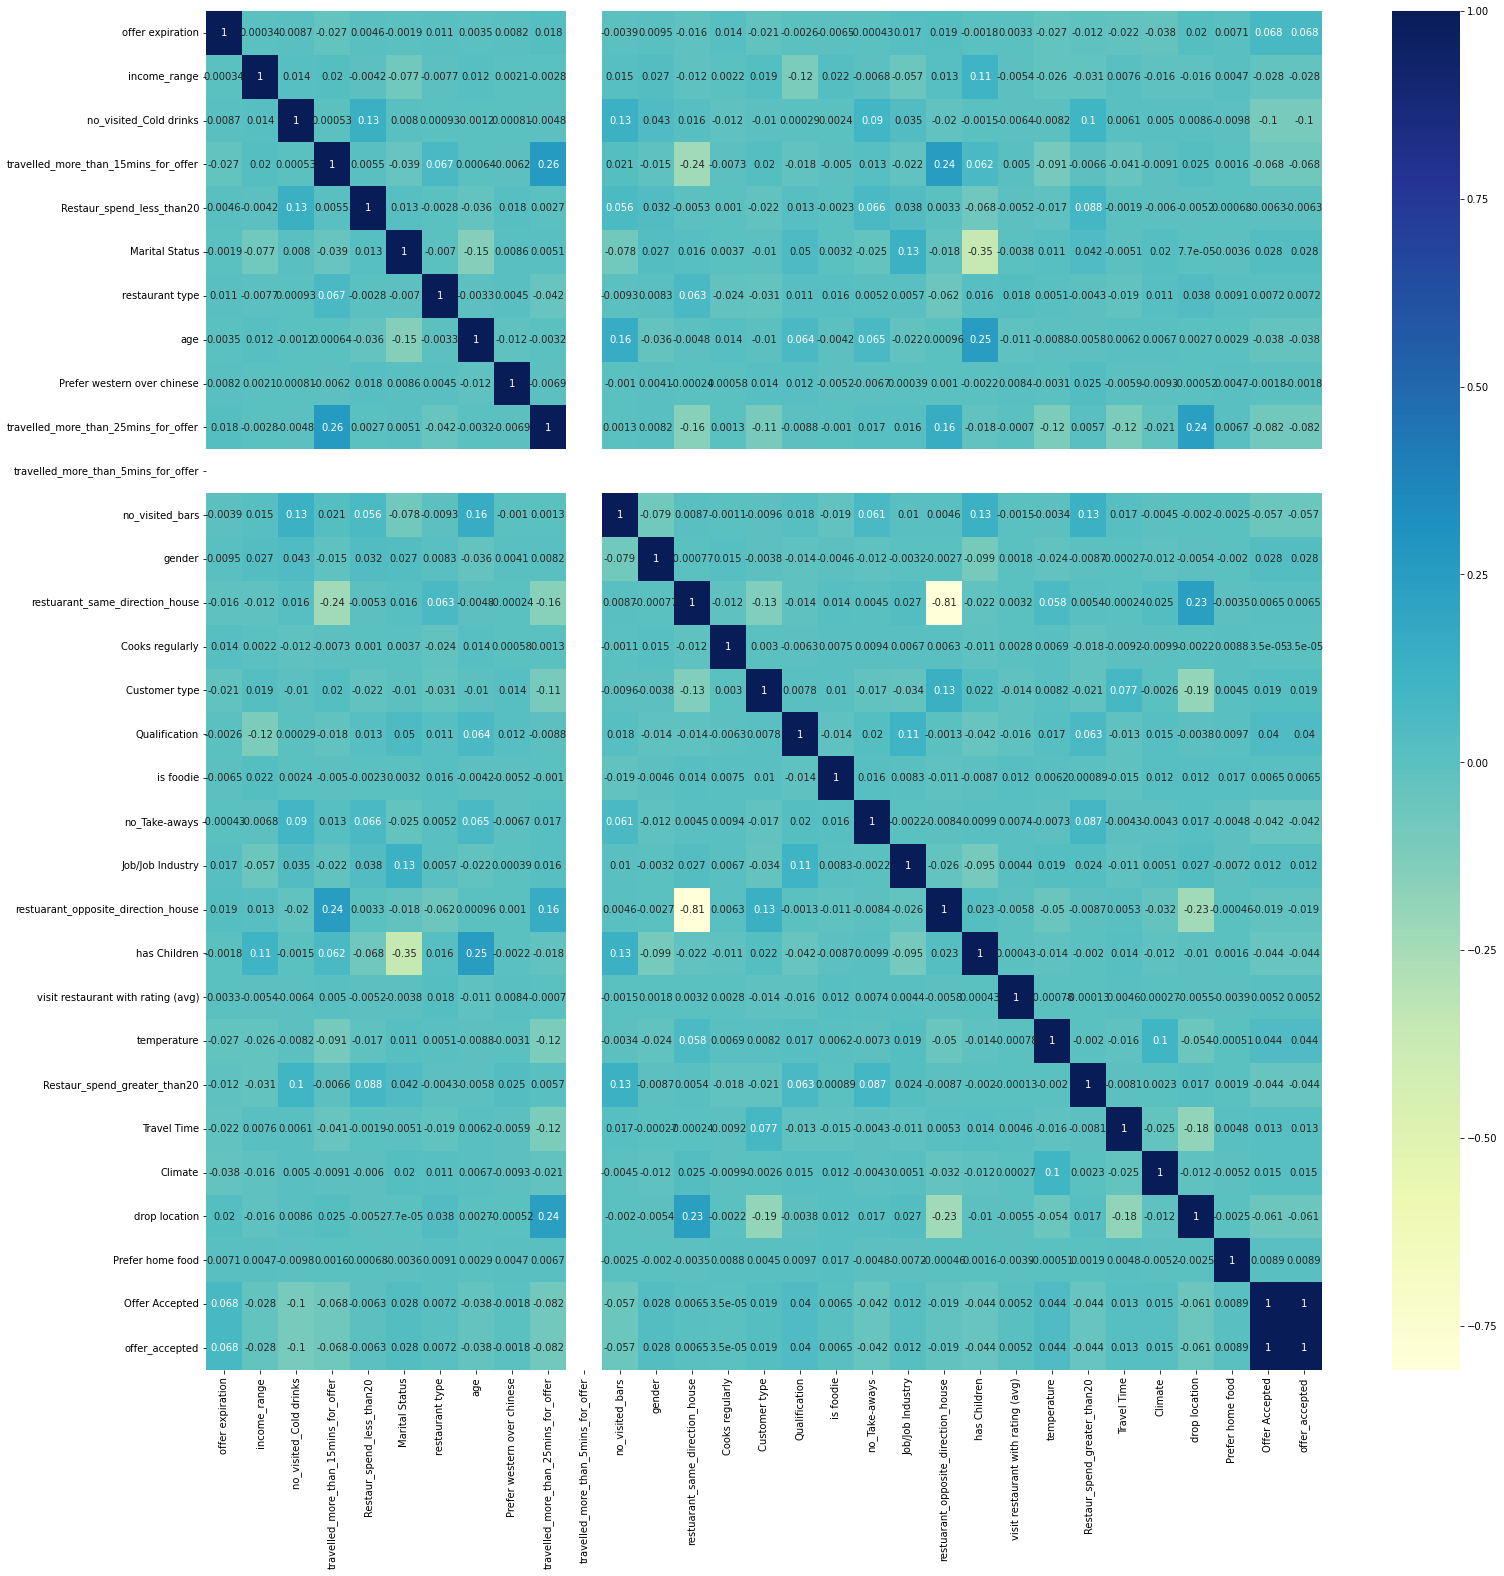

In [12]:
# figsize
plt.figure(figsize=(25,25))
# plotting correlation heatmap
dataplot = sns.heatmap(temp.corr(), cmap="YlGnBu", annot=True)
# displaying heatmap
# plt.savefig('old.png')
plt.show()

### Drop the irrerelevant columns

In [13]:
df=df.drop('travelled_more_than_5mins_for_offer',axis=1)

# DATA CLEANING AND RENAMING

## Date Cleaning Function

In [14]:
def clean_date(date):
    i=0
    for x in date:
        # print(x)
        if x=='2days':
            date[i]=48
        else:
            date[i]=10
        i+=1
    return date

## Income Cleaning Function

In [15]:
def clean_income(data):    
    for i in range(len(data)):
        x=data[i]
        if x=='₹100000 or More':
            data[i]=100000
        elif x=='Less than ₹12500':
            data[i]=12500
        else:
            s=x.strip().split('-')
            a=float(s[0][1:])
            b=float(s[1][2:])
            data[i]=float((a+b)*0.5) # average calculation
    return data

## Age Cleaning Function

In [16]:
def clean_age(age):
    i=0
    for x in age:
        if x=="50plus":
            age[i]=52
        if x=="below21":
            age[i]=18
        i+=1
    return age

## Misclaneous Cleaning Function

In [17]:
def clean_misc(data):
    i=0
    for x in data:
        if x=="never":
            data[i]=0
        if x=="less1":
            data[i]=1
        if x=="1~3":
            data[i]=2
        if x=="4~8":
            data[i]=6
        if x=="gt8":
            data[i]=10
        i+=1
    return data

## Calling the cleaning function

In [18]:
temp=df['offer expiration'].copy()
temp=clean_date(temp)
df['offer expiration']=temp
# temp

In [19]:
temp=df['income_range'].copy()
temp=clean_income(temp)
df['income_range']=temp
# temp

In [20]:
temp=df['age'].copy()
temp=clean_age(temp)
df['age']=temp
# temp
# convert string to an integer
df['age'] = df['age'].astype(int)

### Misc Cleaning func call

In [21]:
cols=['no_visited_Cold drinks','travelled_more_than_15mins_for_offer','Restaur_spend_less_than20',
     'travelled_more_than_25mins_for_offer','no_visited_bars',
     'no_Take-aways','Restaur_spend_greater_than20'
     ]

In [22]:
for i in cols:
    temp=df[i].copy()
    temp=clean_misc(temp)
    df[i]=temp

## Cleaned  dataset

In [23]:
df.tail()

offer expiration income_range no_visited_Cold drinks  \
12374               10      31249.5                      1   
12375               48      31249.5                      6   
12376               10      93749.5                      6   
12377               10      18749.5                      6   
12378               48      43749.5                      2   

      travelled_more_than_15mins_for_offer Restaur_spend_less_than20  \
12374                                    1                        10   
12375                                    0                         0   
12376                                    1                        10   
12377                                    1                         1   
12378                                    1                         1   

          Marital Status       restaurant type  age  \
12374  Unmarried partner   Restaurant with pub   52   
12375             Single  Take-away restaurant   21   
12376    Married partner           Cold drinks   31   
12377    Married partner     2 star restaurant   26   
12378  Unmarried partner     4 star restaurant   18   

      Prefer western over chinese travelled_more_than_25mins_for_offer  ...  \
12374                           0                                    0  ...   
12375                           0                                    0  ...   
12376                           0                                    1  ...   
12377                           0                                    0  ...   
12378                           1                                    0  ...   

      restuarant_opposite_direction_house has Children  \
12374                                   1            1   
12375                                   1            1   
12376                                   1            0   
12377                                   1            0   
12378                                   1            0   

      visit restaurant with rating (avg) temperature  \
12374                                  1          89   
12375                                  2          67   
12376                                  2          89   
12377                                  1          89   
12378                                  0          67   

      Restaur_spend_greater_than20 Travel Time Climate drop location  \
12374                            0          22  Summer    Location B   
12375                            0          18  Summer    Location B   
12376                           10          18  Spring    Location B   
12377                            1           7  Summer    Location C   
12378                            1           7  Spring    Location A   

      Prefer home food Offer Accepted  
12374                0            Yes  
12375                0            Yes  
12376                1             No  
12377                0            Yes  
12378                1            Yes  

[5 rows x 29 columns]

## Renaming the features

In [24]:
COLS=[]
for x in df.columns:
        COLS.append(x)

In [25]:
COLS[0]="offer_expiration(hrs)"
COLS[1]='income_range'
COLS[2]='visited_ColdDrinks'
COLS[3]='travelled_more_than_15_mins'
COLS[4]='resturant_spend_more_than_20'
COLS[5]='shaadi'
COLS[6]='restaurant_type'
COLS[7]='age'
COLS[8]='western/chinese'
COLS[9]='travel_more_than_25_mins'
# COLS[10]='travel_more_than_5_mins'
COLS[10]='number_visted_bars'
COLS[11]='gender'
COLS[12]='restuarant_same_direction_house'
COLS[13]='cooks_regularly'
COLS[14]='customer_type'
COLS[15]='education'
COLS[16]='is_foodie'
COLS[17]='number_of_take_aways'
COLS[18]='industry'
COLS[19]='restuarant_opposite_house'
COLS[20]='children'
COLS[21]='visit_restaurant_with_rating_(avg)'
COLS[22]='temperature'
COLS[23]='restaurant_spend_greater_than_20'
COLS[24]='travel_time'
COLS[25]='climate'
COLS[26]='drop_location'
COLS[27]='prefer_home_food'
COLS[28]='offer_accepted'

In [26]:
df.columns=COLS

In [27]:
# df.to_csv('train1.csv',index=False)

## Renamed Dataset

In [28]:
df.tail()

offer_expiration(hrs) income_range visited_ColdDrinks  \
12374                    10      31249.5                  1   
12375                    48      31249.5                  6   
12376                    10      93749.5                  6   
12377                    10      18749.5                  6   
12378                    48      43749.5                  2   

      travelled_more_than_15_mins resturant_spend_more_than_20  \
12374                           1                           10   
12375                           0                            0   
12376                           1                           10   
12377                           1                            1   
12378                           1                            1   

                  shaadi       restaurant_type  age western/chinese  \
12374  Unmarried partner   Restaurant with pub   52               0   
12375             Single  Take-away restaurant   21               0   
12376    Married partner           Cold drinks   31               0   
12377    Married partner     2 star restaurant   26               0   
12378  Unmarried partner     4 star restaurant   18               1   

      travel_more_than_25_mins  ... restuarant_opposite_house children  \
12374                        0  ...                         1        1   
12375                        0  ...                         1        1   
12376                        1  ...                         1        0   
12377                        0  ...                         1        0   
12378                        0  ...                         1        0   

      visit_restaurant_with_rating_(avg) temperature  \
12374                                  1          89   
12375                                  2          67   
12376                                  2          89   
12377                                  1          89   
12378                                  0          67   

      restaurant_spend_greater_than_20 travel_time climate drop_location  \
12374                                0          22  Summer    Location B   
12375                                0          18  Summer    Location B   
12376                               10          18  Spring    Location B   
12377                                1           7  Summer    Location C   
12378                                1           7  Spring    Location A   

      prefer_home_food offer_accepted  
12374                0            Yes  
12375                0            Yes  
12376                1             No  
12377                0            Yes  
12378                1            Yes  

[5 rows x 29 columns]

# SEPARATE THE FEATURE AND TARGET

In [29]:
features=df.columns[:-1]
target=df.columns[-1]

In [30]:
X=df[features]
y=df[target]

# FEATURE ENGINEERING

## Label Encoding the target

In [31]:
lb=LabelEncoder().fit(y)
y=lb.transform(y)

## Selecting Cols and use pd dummies

In [32]:
l=X.columns.to_list()
order=['offer_expiration(hrs)','age','income_range','temperature','travel_time',
       'restuarant_same_direction_house','western/chinese','children','cooks_regularly',
       'prefer_home_food','visit_restaurant_with_rating_(avg)',
       'visited_ColdDrinks','travelled_more_than_15_mins','resturant_spend_more_than_20',
       'travel_more_than_25_mins','number_visted_bars',
       'number_of_take_aways','restuarant_opposite_house',
       'restaurant_spend_greater_than_20','is_foodie'
      ]
for i in order:
    l.remove(i)

In [33]:
X=pd.get_dummies(data=X,columns=l)

In [34]:
# X.shape

## Ordinal Encoding

In [35]:
enc=OrdinalEncoder()
ord=enc.fit(X)
temp=ord.transform(X)
X=pd.DataFrame(data=temp,columns=X.columns)

In [36]:
X.tail()

offer_expiration(hrs)  income_range  visited_ColdDrinks  \
12374                    0.0           2.0                 1.0   
12375                    1.0           2.0                 3.0   
12376                    0.0           7.0                 3.0   
12377                    0.0           1.0                 3.0   
12378                    1.0           3.0                 2.0   

       travelled_more_than_15_mins  resturant_spend_more_than_20  age  \
12374                          1.0                           4.0  7.0   
12375                          0.0                           0.0  1.0   
12376                          1.0                           4.0  3.0   
12377                          1.0                           1.0  2.0   
12378                          1.0                           1.0  0.0   

       western/chinese  travel_more_than_25_mins  number_visted_bars  \
12374              0.0                       0.0                 0.0   
12375              0.0                       0.0                 2.0   
12376              0.0                       1.0                 2.0   
12377              0.0                       0.0                 0.0   
12378              1.0                       0.0                 1.0   

       restuarant_same_direction_house  ...  industry_Sales & Related  \
12374                              0.0  ...                       1.0   
12375                              0.0  ...                       0.0   
12376                              0.0  ...                       0.0   
12377                              0.0  ...                       0.0   
12378                              0.0  ...                       0.0   

       industry_Student  industry_Transportation & Material Moving  \
12374               0.0                                        0.0   
12375               0.0                                        0.0   
12376               0.0                                        0.0   
12377               1.0                                        0.0   
12378               0.0                                        0.0   

       industry_Unemployed  climate_Spring  climate_Summer  climate_Winter  \
12374                  0.0             0.0             1.0             0.0   
12375                  0.0             0.0             1.0             0.0   
12376                  0.0             1.0             0.0             0.0   
12377                  0.0             0.0             1.0             0.0   
12378                  0.0             1.0             0.0             0.0   

       drop_location_Location A  drop_location_Location B  \
12374                       0.0                       1.0   
12375                       0.0                       1.0   
12376                       0.0                       1.0   
12377                       0.0                       0.0   
12378                       1.0                       0.0   

       drop_location_Location C  
12374                       0.0  
12375                       0.0  
12376                       0.0  
12377                       1.0  
12378                       0.0  

[5 rows x 73 columns]

In [37]:
X.shape

(12379, 73)

# Train Test Split

In [38]:
X_train, X_test, y_train, y_test = train_test_split(
     X, y, 
    test_size=0.20,
    random_state=42,
    shuffle=True
)

# Data Visualistion

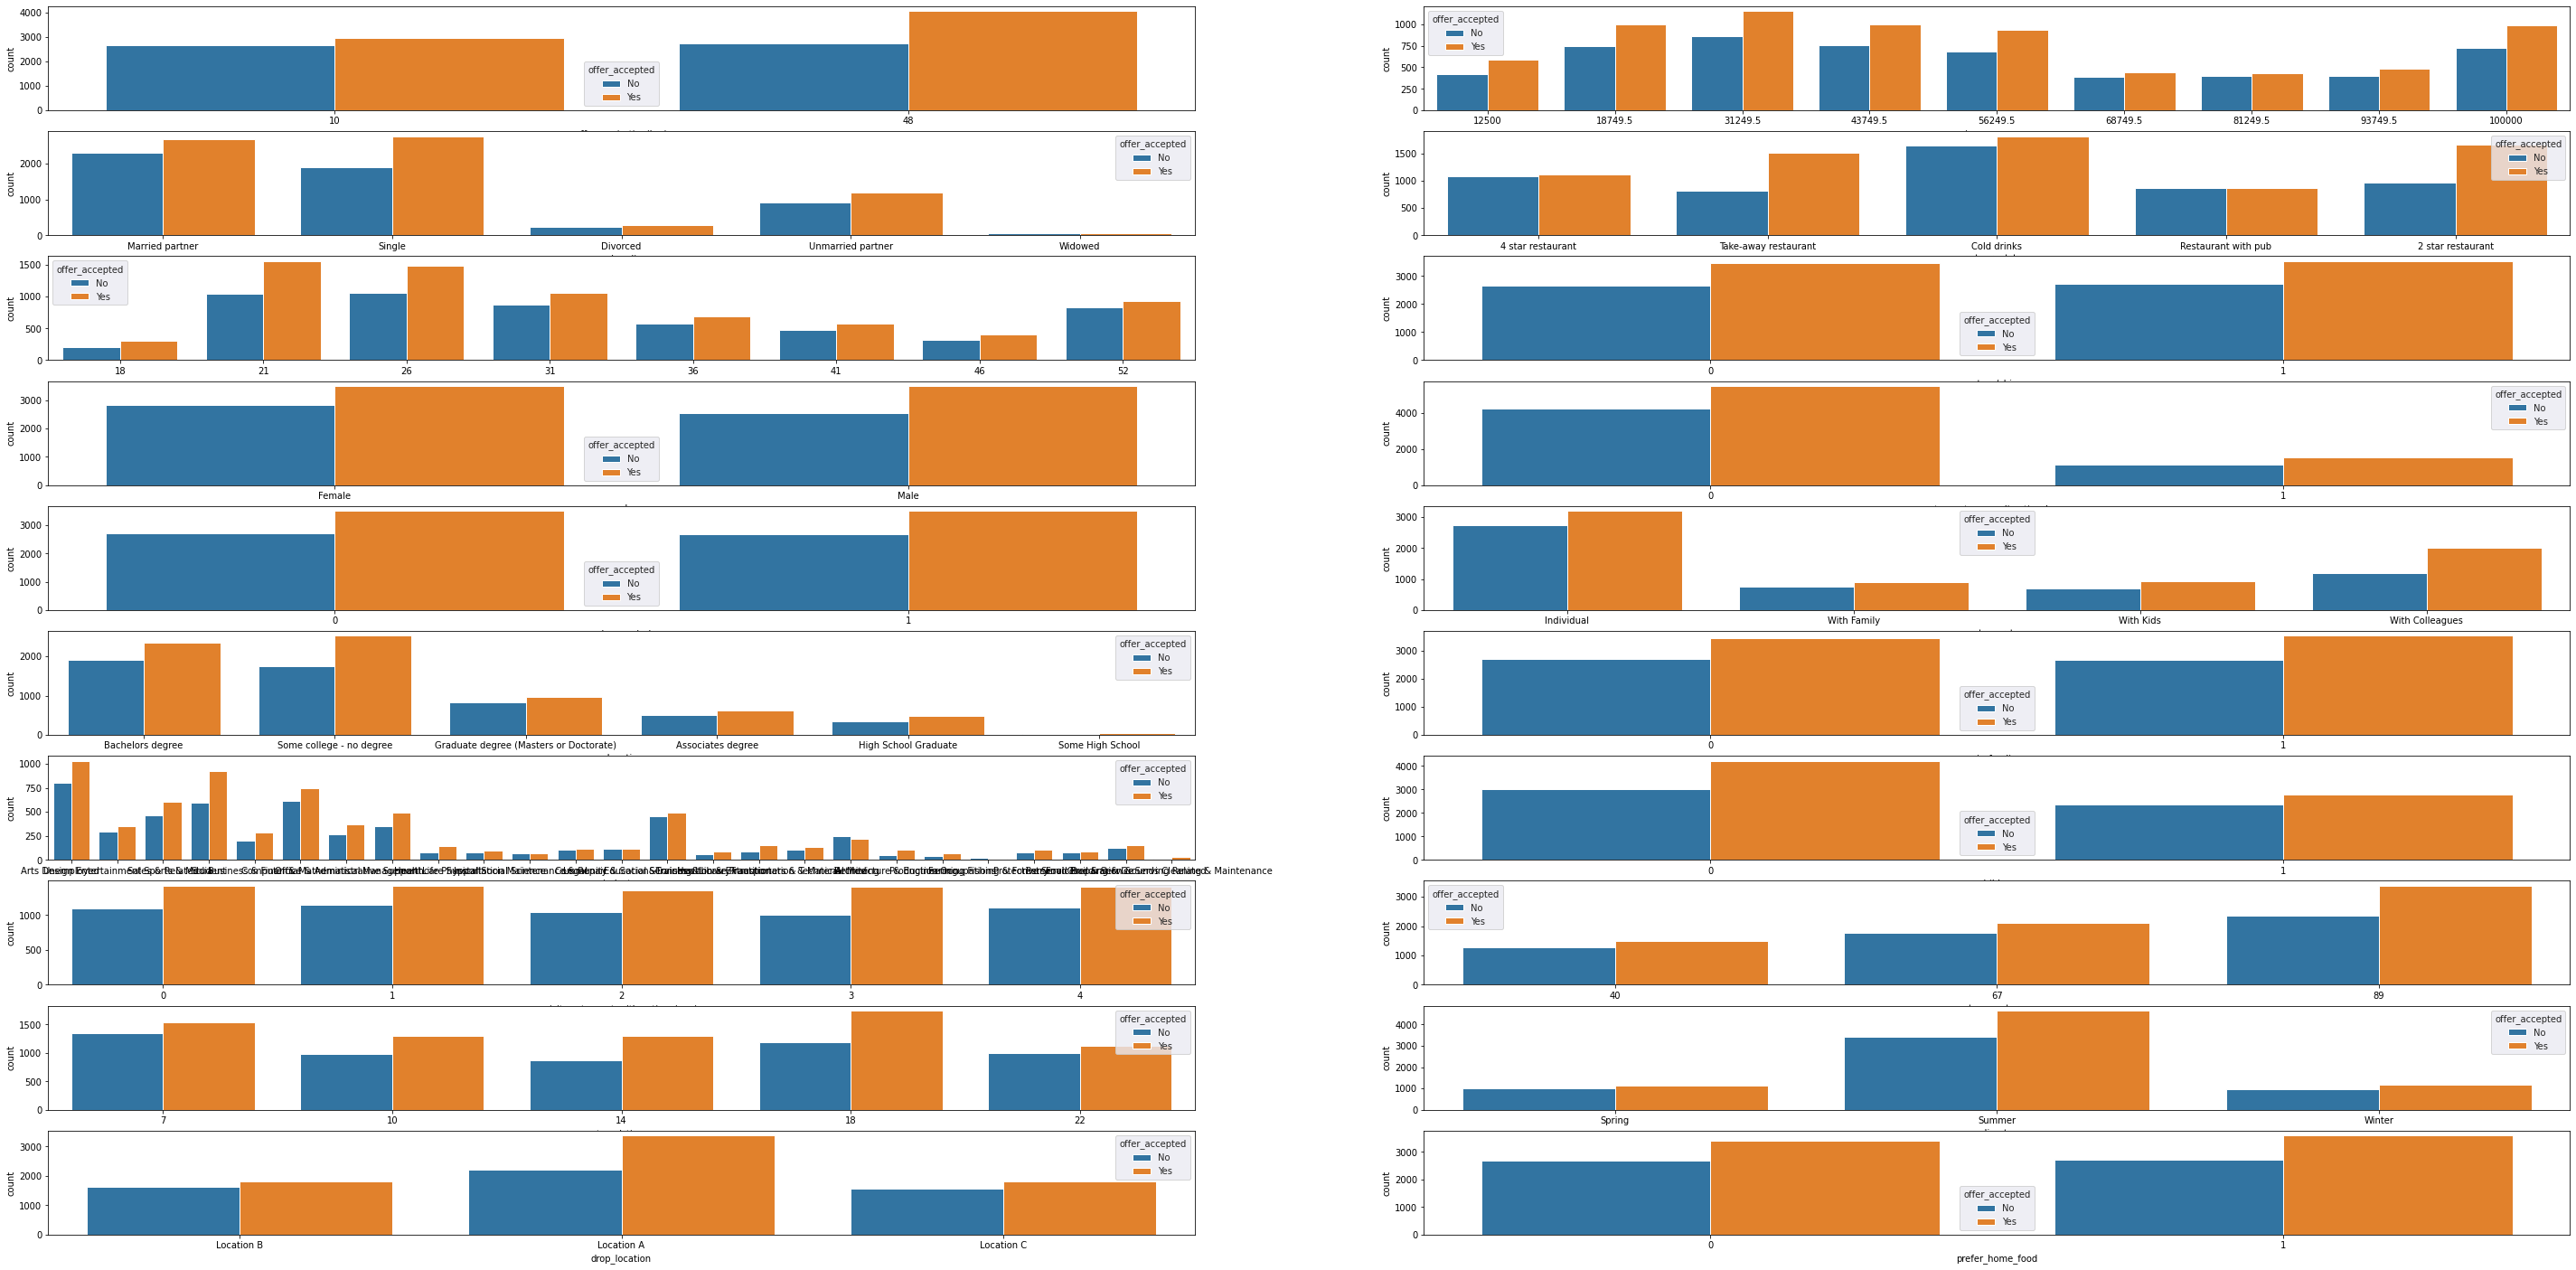

In [39]:
fig, ax = plt.subplots(10,2,figsize=(50, 25))
sns.set_style('darkgrid')
sns.countplot(data=df,x='offer_expiration(hrs)',hue="offer_accepted", ax=ax[0,0])
sns.countplot(data=df,x='income_range',hue="offer_accepted", ax=ax[0,1])
sns.countplot(data=df,x='shaadi',hue="offer_accepted", ax=ax[1,0])
sns.countplot(data=df,x='restaurant_type',hue="offer_accepted", ax=ax[1,1])
sns.countplot(data=df,x='age',hue="offer_accepted", ax=ax[2,0])
sns.countplot(data=df,x='western/chinese',hue="offer_accepted", ax=ax[2,1])
sns.countplot(data=df,x='gender',hue="offer_accepted", ax=ax[3,0])
sns.countplot(data=df,x='restuarant_same_direction_house',hue="offer_accepted", ax=ax[3,1])
sns.countplot(data=df,x='cooks_regularly',hue="offer_accepted", ax=ax[4,0])
sns.countplot(data=df,x='customer_type',hue="offer_accepted", ax=ax[4,1])
sns.countplot(data=df,x='education',hue="offer_accepted", ax=ax[5,0])
sns.countplot(data=df,x='is_foodie',hue="offer_accepted", ax=ax[5,1])
sns.countplot(data=df,x='industry',hue="offer_accepted", ax=ax[6,0])
sns.countplot(data=df,x='children',hue="offer_accepted", ax=ax[6,1])
sns.countplot(data=df,x='visit_restaurant_with_rating_(avg)',hue="offer_accepted", ax=ax[7,0])
sns.countplot(data=df,x='temperature',hue="offer_accepted", ax=ax[7,1])
sns.countplot(data=df,x='travel_time',hue="offer_accepted", ax=ax[8,0])
sns.countplot(data=df,x='climate',hue="offer_accepted", ax=ax[8,1])
sns.countplot(data=df,x='drop_location',hue="offer_accepted", ax=ax[9,0])
sns.countplot(data=df,x='prefer_home_food',hue="offer_accepted", ax=ax[9,1])
# sns.countplot(data=df,x='offer_accepted',hue="offer_accepted", ax=ax[20])
fig.show()

<AxesSubplot:xlabel='age', ylabel='Count'>

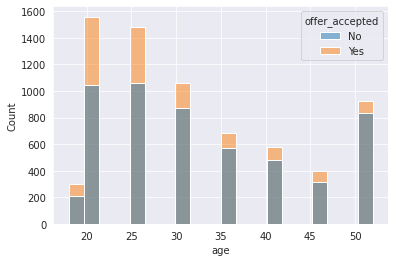

In [40]:
sns.histplot(data=df,x="age",hue="offer_accepted")

<AxesSubplot:xlabel='shaadi', ylabel='Count'>

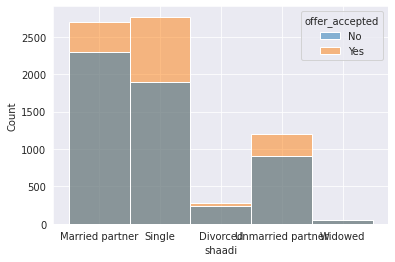

In [41]:
sns.histplot(data=df,x="shaadi",hue="offer_accepted")

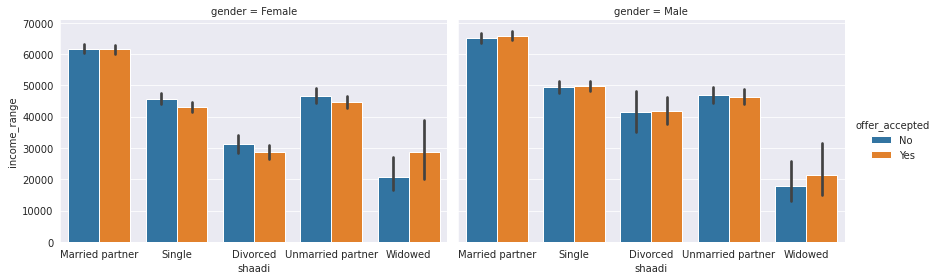

In [42]:
sns.catplot(data=df,x='shaadi',y='income_range',hue='offer_accepted',col='gender',kind="bar", height=4,aspect=1.5)

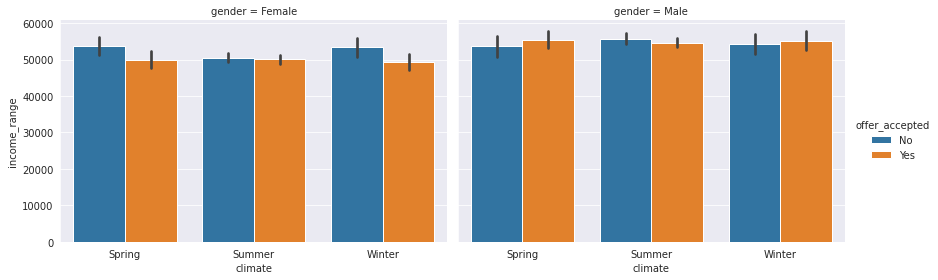

In [43]:
sns.catplot(data=df,x='climate',y='income_range',hue='offer_accepted',col='gender',kind="bar", height=4,aspect=1.5)

In [44]:
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']

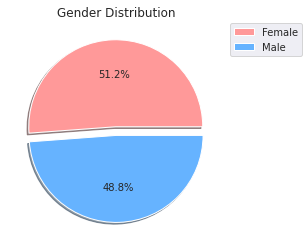

In [45]:
data = df["gender"].value_counts()
ax = data.plot(kind="pie", autopct='%1.1f%%', shadow=True, explode=[0.05, 0.05], colors=colors, legend=True, title='Gender Distribution', ylabel='', labeldistance=None)
ax.legend(bbox_to_anchor=(1, 1.02), loc='upper left')
plt.show()

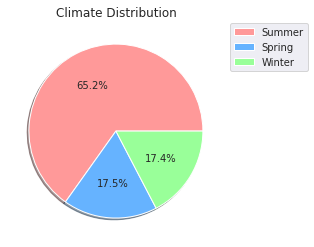

In [46]:
data = df["climate"].value_counts()
ax = data.plot(kind="pie", autopct='%1.1f%%', shadow=True, colors=colors, legend=True, title='Climate Distribution', ylabel='', labeldistance=None)
ax.legend(bbox_to_anchor=(1, 1.02), loc='upper left')
plt.show()

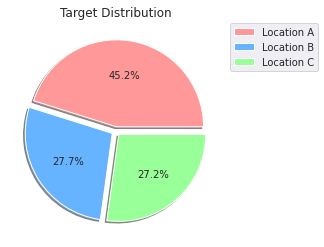

In [47]:
data = df["drop_location"].value_counts()
ax = data.plot(kind="pie", autopct='%1.1f%%', shadow=True, explode=[0.05, 0.05, 0.05], colors=colors, legend=True, title='Target Distribution', ylabel='', labeldistance=None)
ax.legend(bbox_to_anchor=(1, 1.02), loc='upper left')
plt.show()

# Checking the Data for Imbalance

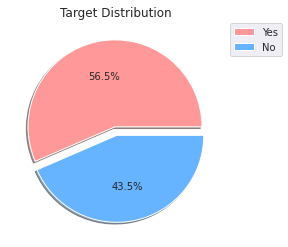

In [48]:
data = df["offer_accepted"].value_counts()
ax = data.plot(kind="pie", autopct='%1.1f%%', shadow=True, explode=[0.05, 0.05], colors=colors, legend=True, title='Target Distribution', ylabel='', labeldistance=None)
ax.legend(bbox_to_anchor=(1, 1.02), loc='upper left')
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='offer_accepted', ylabel='count'>

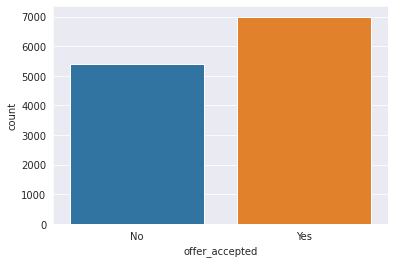

In [49]:
sns.countplot(df["offer_accepted"])

# Baseline Model :- Dummy Classifier

In [50]:
from sklearn.dummy import DummyClassifier
dummy=DummyClassifier(strategy='most_frequent')

In [51]:
dummy.fit(X_train,y_train)

DummyClassifier(strategy='most_frequent')

In [52]:
print('Emperical/Training Error',dummy.score(X_train,y_train))
print('Genrealisation/Test Error',dummy.score(X_test,y_test))
scores = cross_val_score(dummy, X, y, cv=5,scoring='f1_macro',n_jobs=-1)
print("Accuracy of %0.3f \n with a \n Standard Deviation of %0.3f" % (scores.mean(), scores.std()))

Emperical/Training Error 0.567807735029789
Genrealisation/Test Error 0.5537156704361874
Accuracy of 0.361 
 with a 
 Standard Deviation of 0.000


# Linear Classifiers

In [53]:
classifers=[RidgeClassifier(), LogisticRegression(max_iter=1000), Perceptron()]

In [54]:
for clf in classifers:
    clf.fit(X_train,y_train)
    print('####',clf,'######')
    print('Emperical/Training Error',clf.score(X_train,y_train))
    print('Genrealisation/Test Error',clf.score(X_test,y_test))
    scores = cross_val_score(clf, X, y, cv=5,scoring='f1_macro',n_jobs=-1)
    print("Accuracy of %0.3f \n with a \n Standard Deviation of %0.3f" % (scores.mean(), scores.std()))

#### RidgeClassifier() ######
Emperical/Training Error 0.617489649601131
Genrealisation/Test Error 0.6070274636510501
Accuracy of 0.579 
 with a 
 Standard Deviation of 0.009
#### LogisticRegression(max_iter=1000) ######
Emperical/Training Error 0.6171867110976472
Genrealisation/Test Error 0.6082390953150242
Accuracy of 0.580 
 with a 
 Standard Deviation of 0.008
#### Perceptron() ######
Emperical/Training Error 0.5782086236493992
Genrealisation/Test Error 0.5678513731825525
Accuracy of 0.482 
 with a 
 Standard Deviation of 0.059


# Naive Bayes Classifiers

In [55]:
classifers=[GaussianNB(), BernoulliNB(), CategoricalNB(),ComplementNB(),MultinomialNB()]

In [56]:
for clf in classifers:
    clf.fit(X_train,y_train)
    print('####',clf,'######')
    print('Emperical/Training Error',clf.score(X_train,y_train))
    print('Genrealisation/Test Error',clf.score(X_test,y_test))
    scores = cross_val_score(clf, X, y, cv=5,scoring='f1_macro',n_jobs=-1)
    print("Accuracy of %0.3f \n with a \n Standard Deviation of %0.3f" % (scores.mean(), scores.std()))

#### GaussianNB() ######
Emperical/Training Error 0.5742704231041099
Genrealisation/Test Error 0.567043618739903
Accuracy of 0.560 
 with a 
 Standard Deviation of 0.009
#### BernoulliNB() ######
Emperical/Training Error 0.6132485105523579
Genrealisation/Test Error 0.5932956381260097
Accuracy of 0.584 
 with a 
 Standard Deviation of 0.009
#### CategoricalNB() ######
Emperical/Training Error 0.6148641825709381
Genrealisation/Test Error 0.5981421647819063
Accuracy of 0.591 
 with a 
 Standard Deviation of 0.009
#### ComplementNB() ######
Emperical/Training Error 0.5936584873270726
Genrealisation/Test Error 0.5864297253634895
Accuracy of 0.585 
 with a 
 Standard Deviation of 0.005
#### MultinomialNB() ######
Emperical/Training Error 0.6054730889629405
Genrealisation/Test Error 0.5880452342487884
Accuracy of 0.576 
 with a 
 Standard Deviation of 0.005


# Tree Methods Classifiers

In [57]:
classifers=[DecisionTreeClassifier(),ExtraTreeClassifier()]

In [58]:
for clf in classifers:
    clf.fit(X_train,y_train)
    print('####',clf,'######')
    print('Emperical/Training Error',clf.score(X_train,y_train))
    print('Genrealisation/Test Error',clf.score(X_test,y_test))
    scores = cross_val_score(clf, X, y, cv=5,scoring='f1_macro',n_jobs=-1)
    print("Accuracy of %0.3f \n with a \n Standard Deviation of %0.3f" % (scores.mean(), scores.std()))

#### DecisionTreeClassifier() ######
Emperical/Training Error 1.0
Genrealisation/Test Error 0.5444264943457189
Accuracy of 0.546 
 with a 
 Standard Deviation of 0.008
#### ExtraTreeClassifier() ######
Emperical/Training Error 1.0
Genrealisation/Test Error 0.5347334410339257
Accuracy of 0.531 
 with a 
 Standard Deviation of 0.008


# Ensemble Classifiers

In [59]:
classifers=[AdaBoostClassifier(),BaggingClassifier(),
            GradientBoostingClassifier(),RandomForestClassifier(),
            HistGradientBoostingClassifier()]

In [60]:
for clf in classifers:
    clf.fit(X_train,y_train)
    print('####',clf,'######')
    print('Emperical/Training Error',clf.score(X_train,y_train))
    print('Genrealisation/Test Error',clf.score(X_test,y_test))
    scores = cross_val_score(clf, X, y, cv=5,scoring='f1_macro',n_jobs=-1)
    print("Accuracy of %0.3f \n with a \n Standard Deviation of %0.3f" % (scores.mean(), scores.std()))

#### AdaBoostClassifier() ######
Emperical/Training Error 0.6249621326870646
Genrealisation/Test Error 0.6042003231017771
Accuracy of 0.586 
 with a 
 Standard Deviation of 0.007
#### BaggingClassifier() ######
Emperical/Training Error 0.9881853983641321
Genrealisation/Test Error 0.595718901453958
Accuracy of 0.586 
 with a 
 Standard Deviation of 0.012
#### GradientBoostingClassifier() ######
Emperical/Training Error 0.6638392406341512
Genrealisation/Test Error 0.6284329563812601
Accuracy of 0.601 
 with a 
 Standard Deviation of 0.010
#### RandomForestClassifier() ######
Emperical/Training Error 1.0
Genrealisation/Test Error 0.630048465266559
Accuracy of 0.601 
 with a 
 Standard Deviation of 0.003
#### HistGradientBoostingClassifier() ######
Emperical/Training Error 0.7832979905079269
Genrealisation/Test Error 0.6231825525040388
Accuracy of 0.609 
 with a 
 Standard Deviation of 0.006


# KNN and Discriminant Analysis Classfiers

In [61]:
classifers=[
    # MLPClassifier(max_iter=10000),
            KNeighborsClassifier(),LinearDiscriminantAnalysis(),QuadraticDiscriminantAnalysis()]

In [62]:
for clf in classifers:
    clf.fit(X_train,y_train)
    print('####',clf,'######')
    print('Emperical/Training Error',clf.score(X_train,y_train))
    print('Genrealisation/Test Error',clf.score(X_test,y_test))
    scores = cross_val_score(clf, X, y, cv=5,scoring='f1_macro',n_jobs=-1)
    print("Accuracy of %0.3f \n with a \n Standard Deviation of %0.3f" % (scores.mean(), scores.std()))

#### KNeighborsClassifier() ######
Emperical/Training Error 0.7293749368878117
Genrealisation/Test Error 0.5872374798061389
Accuracy of 0.565 
 with a 
 Standard Deviation of 0.005
#### LinearDiscriminantAnalysis() ######
Emperical/Training Error 0.6164798545895184
Genrealisation/Test Error 0.6082390953150242
Accuracy of 0.580 
 with a 
 Standard Deviation of 0.009
#### QuadraticDiscriminantAnalysis() ######
Emperical/Training Error 0.534989397152378
Genrealisation/Test Error 0.5375605815831987


/opt/conda/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Accuracy of 0.513 
 with a 
 Standard Deviation of 0.013


# SVC Classifiers

In [63]:
classifers=[LinearSVC(max_iter=100000),SVC()]

In [64]:
for clf in classifers:
    clf.fit(X_train,y_train)
    print('####',clf,'######')
    print('Emperical/Training Error',clf.score(X_train,y_train))
    print('Genrealisation/Test Error',clf.score(X_test,y_test))
    scores = cross_val_score(clf, X, y, cv=5,scoring='f1_macro',n_jobs=-1)
    print("Accuracy of %0.3f \n with a \n Standard Deviation of %0.3f" % (scores.mean(), scores.std()))

#### LinearSVC(max_iter=100000) ######
Emperical/Training Error 0.617489649601131
Genrealisation/Test Error 0.6066235864297254
Accuracy of 0.580 
 with a 
 Standard Deviation of 0.009
#### SVC() ######
Emperical/Training Error 0.661415732606281
Genrealisation/Test Error 0.6219709208400647
Accuracy of 0.583 
 with a 
 Standard Deviation of 0.009


# Choosing the best classifier

In [65]:
clf=HistGradientBoostingClassifier()

## Params to tune for

In [66]:
param_test = {
               'max_leaf_nodes':[20,31,45,50,55],
               'max_depth':[4,5,6,8,None],
               'min_samples_leaf':[10,20,30,40,50,60],
               'warm_start':[True,False],
               'loss':['log_loss','binary_crossentropy'],
               'learning_rate':[0.01,0.05,0.1,0.5,1]
               }

## Grid Search for hyperparameter tune

In [67]:
gsearch1 = GridSearchCV(
                        estimator = clf,
                        param_grid = param_test, 
                        scoring='f1_macro',cv=5,
                        verbose=10,
                        n_jobs=-1
                    ) 
gsearch1.fit(X,y)

Fitting 5 folds for each of 3000 candidates, totalling 15000 fits
[CV 4/5; 1/3000] START learning_rate=0.01, loss=log_loss, max_depth=4, max_leaf_nodes=20, min_samples_leaf=10, warm_start=True
[CV 4/5; 1/3000] END learning_rate=0.01, loss=log_loss, max_depth=4, max_leaf_nodes=20, min_samples_leaf=10, warm_start=True;, score=nan total time=   0.0s
[CV 3/5; 2/3000] START learning_rate=0.01, loss=log_loss, max_depth=4, max_leaf_nodes=20, min_samples_leaf=10, warm_start=False
[CV 3/5; 2/3000] END learning_rate=0.01, loss=log_loss, max_depth=4, max_leaf_nodes=20, min_samples_leaf=10, warm_start=False;, score=nan total time=   0.0s
[CV 2/5; 4/3000] START learning_rate=0.01, loss=log_loss, max_depth=4, max_leaf_nodes=20, min_samples_leaf=20, warm_start=False
[CV 2/5; 4/3000] END learning_rate=0.01, loss=log_loss, max_depth=4, max_leaf_nodes=20, min_samples_leaf=20, warm_start=False;, score=nan total time=   0.0s
[CV 3/5; 4/3000] START learning_rate=0.01, loss=log_loss, max_depth=4, max_leaf_n

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
7500 fits failed out of a total of 15000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
7500 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_hist_gradient_boosting/gradient_boosting.py", line 251, in fit
    self._validate_parameters()
  File "/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_hist_gradient_boosting/gradient_boosting.py", line 85, in _validate_parameters
    sel

GridSearchCV(cv=5, estimator=HistGradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1, 0.5, 1],
                         'loss': ['log_loss', 'binary_crossentropy'],
                         'max_depth': [4, 5, 6, 8, None],
                         'max_leaf_nodes': [20, 31, 45, 50, 55],
                         'min_samples_leaf': [10, 20, 30, 40, 50, 60],
                         'warm_start': [True, False]},
             scoring='f1_macro', verbose=10)

In [68]:
# clf.fit(X_train,y_train)

## Result for Best Grid Search Estimator

In [69]:
gsearch1.best_score_

0.6145024859185687

In [70]:
gsearch1.best_estimator_

HistGradientBoostingClassifier(loss='binary_crossentropy', max_leaf_nodes=45,
                               min_samples_leaf=40, warm_start=True)

In [71]:
gsearch1.best_params_

{'learning_rate': 0.1,
 'loss': 'binary_crossentropy',
 'max_depth': None,
 'max_leaf_nodes': 45,
 'min_samples_leaf': 40,
 'warm_start': True}

# Generating Submission

In [72]:
ans=pd.read_csv('../input/marketing-strategy-personalised-offer/test_data.csv')

## Imputation

In [73]:
temp=SimpleImputer(strategy='most_frequent').fit_transform(ans)
ans=pd.DataFrame(data=temp,columns=ans.columns)

## Cleaning

In [74]:
temp=ans['offer expiration'].copy()
temp=clean_date(temp)
ans['offer expiration']=temp
# temp

In [75]:
temp=ans['income_range'].copy()
temp=clean_income(temp)
ans['income_range']=temp
# temp

In [76]:
temp=ans['age'].copy()
temp=clean_age(temp)
ans['age']=temp
# temp
# convert string to an integer
ans['age'] = ans['age'].astype(int)

In [77]:
for i in cols:
    temp=ans[i].copy()
    temp=clean_misc(temp)
    ans[i]=temp

In [78]:
ans.shape

(5305, 30)

## Dropping

In [79]:
ans=ans.drop('travelled_more_than_5mins_for_offer',axis=1)
ans=ans.drop('car',axis=1)

## Renaming

In [80]:
tar=COLS[:-1]
ans.columns=tar

In [81]:
ans.tail()

offer_expiration(hrs) income_range visited_ColdDrinks  \
5300                    48      31249.5                  1   
5301                    10      68749.5                  2   
5302                    10      56249.5                 10   
5303                    48      56249.5                  2   
5304                    48      43749.5                  1   

     travelled_more_than_15_mins resturant_spend_more_than_20  \
5300                           0                            1   
5301                           0                            6   
5302                           1                            6   
5303                           1                            2   
5304                           0                            2   

                 shaadi      restaurant_type  age western/chinese  \
5300  Unmarried partner    4 star restaurant   26               0   
5301    Married partner    2 star restaurant   26               0   
5302    Married partner          Cold drinks   36               0   
5303    Married partner  Restaurant with pub   36               1   
5304    Married partner    4 star restaurant   52               1   

     travel_more_than_25_mins  ...                                  industry  \
5300                        0  ...        Food Preparation & Serving Related   
5301                        0  ...                                Unemployed   
5302                        0  ...  Arts Design Entertainment Sports & Media   
5303                        0  ...                Education&Training&Library   
5304                        0  ...                   Computer & Mathematical   

     restuarant_opposite_house children visit_restaurant_with_rating_(avg)  \
5300                         0        0                                  1   
5301                         0        0                                  3   
5302                         1        1                                  2   
5303                         1        1                                  3   
5304                         1        1                                  4   

     temperature restaurant_spend_greater_than_20 travel_time climate  \
5300          67                                2          18  Summer   
5301          89                                2          18  Summer   
5302          67                                2           7  Summer   
5303          89                                2           7  Summer   
5304          89                                2           7  Winter   

     drop_location prefer_home_food  
5300    Location B                0  
5301    Location B                1  
5302    Location C                1  
5303    Location A                0  
5304    Location A                0  

[5 rows x 28 columns]

## Dummy and Ordinal Encoding

In [82]:
ans=pd.get_dummies(data=ans,columns=l)

In [83]:
temp=ord.transform(ans)
ans=pd.DataFrame(data=temp,columns=X.columns)

In [84]:
ans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5305 entries, 0 to 5304
Data columns (total 73 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   offer_expiration(hrs)                               5305 non-null   float64
 1   income_range                                        5305 non-null   float64
 2   visited_ColdDrinks                                  5305 non-null   float64
 3   travelled_more_than_15_mins                         5305 non-null   float64
 4   resturant_spend_more_than_20                        5305 non-null   float64
 5   age                                                 5305 non-null   float64
 6   western/chinese                                     5305 non-null   float64
 7   travel_more_than_25_mins                            5305 non-null   float64
 8   number_visted_bars                                  5305 non-null   float64
 9

In [85]:
ans.tail()

offer_expiration(hrs)  income_range  visited_ColdDrinks  \
5300                    1.0           2.0                 1.0   
5301                    0.0           5.0                 2.0   
5302                    0.0           4.0                 4.0   
5303                    1.0           4.0                 2.0   
5304                    1.0           3.0                 1.0   

      travelled_more_than_15_mins  resturant_spend_more_than_20  age  \
5300                          0.0                           1.0  2.0   
5301                          0.0                           3.0  2.0   
5302                          1.0                           3.0  4.0   
5303                          1.0                           2.0  4.0   
5304                          0.0                           2.0  7.0   

      western/chinese  travel_more_than_25_mins  number_visted_bars  \
5300              0.0                       0.0                 1.0   
5301              0.0                       0.0                 3.0   
5302              0.0                       0.0                 3.0   
5303              1.0                       0.0                 0.0   
5304              1.0                       0.0                 2.0   

      restuarant_same_direction_house  ...  industry_Sales & Related  \
5300                              1.0  ...                       0.0   
5301                              1.0  ...                       0.0   
5302                              0.0  ...                       0.0   
5303                              0.0  ...                       0.0   
5304                              0.0  ...                       0.0   

      industry_Student  industry_Transportation & Material Moving  \
5300               0.0                                        0.0   
5301               0.0                                        0.0   
5302               0.0                                        0.0   
5303               0.0                                        0.0   
5304               0.0                                        0.0   

      industry_Unemployed  climate_Spring  climate_Summer  climate_Winter  \
5300                  0.0             0.0             1.0             0.0   
5301                  1.0             0.0             1.0             0.0   
5302                  0.0             0.0             1.0             0.0   
5303                  0.0             0.0             1.0             0.0   
5304                  0.0             0.0             0.0             1.0   

      drop_location_Location A  drop_location_Location B  \
5300                       0.0                       1.0   
5301                       0.0                       1.0   
5302                       0.0                       0.0   
5303                       1.0                       0.0   
5304                       1.0                       0.0   

      drop_location_Location C  
5300                       0.0  
5301                       0.0  
5302                       1.0  
5303                       0.0  
5304                       0.0  

[5 rows x 73 columns]

## Prediction

In [86]:
out=gsearch1.predict(ans)
# out=clf.predict(ans)
out=lb.inverse_transform(out)

In [87]:
submission=pd.DataFrame(columns=['id','Offer Accepted'])
submission['id']=[i for i in range(len(ans))]
submission['Offer Accepted']=out

# Plot

<AxesSubplot:xlabel='Offer Accepted', ylabel='count'>

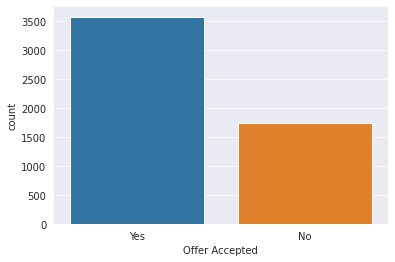

In [88]:
sns.countplot(x=submission['Offer Accepted'])

# Save to CSV

In [89]:
submission.to_csv('submission.csv',index=False)